# 01. Data Analytics Part

In [36]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as data
import seaborn as sb
%matplotlib inline

In [40]:
df = pd.read_csv('transit-ridership.csv') #First read all the data from the csv file
df= df.rename(columns={'Unnamed: 0': 'Year'}) #Rename the unnamed column title to 'Year'
for i in df.columns: #for each column
    df[i] = df[i].replace(",", "", regex=True) #remove all the commas in between each values
df = df._convert(numeric=True) #convert the elements to numeric values

In [41]:
#Eliminating null values 
#To do so, if we find a null, we are going to replace them with the mean of the column
count = 1997
total = len(df[i])
for i in df.columns:
    if i == 'Year':
        df[i] = np.array([x for x in range(count,count+total)])
        
    else:
        a = int(df[i].mean()) #replace all the NaN with the mean value of the column 
        df[i] = df[i].fillna(a) #populate the NaN ones with the mean

df #JUST FOR CHECKING

,Year,July,October,December,February,Total
0,1997,287136,1052714,807508,1157678,9501302.0
1,1998,289269,1142300,753231,982453,8670906.0
2,1999,281914,1055683,673696,1006772,8628101.0
3,2000,297848,1060153,650067,1091131,8800655.0
4,2001,270213,1085119,825356,1159928,10102665.0
5,2002,286552,1227976,524747,1118989,9084277.0
6,2003,311041,1169216,787201,1133363,9369218.0
7,2004,338494,1305943,813161,1154057,10435923.0
8,2005,341083,1217625,739941,1200637,10136585.0
9,2006,289169,1135129,736504,1167974,9958497.0


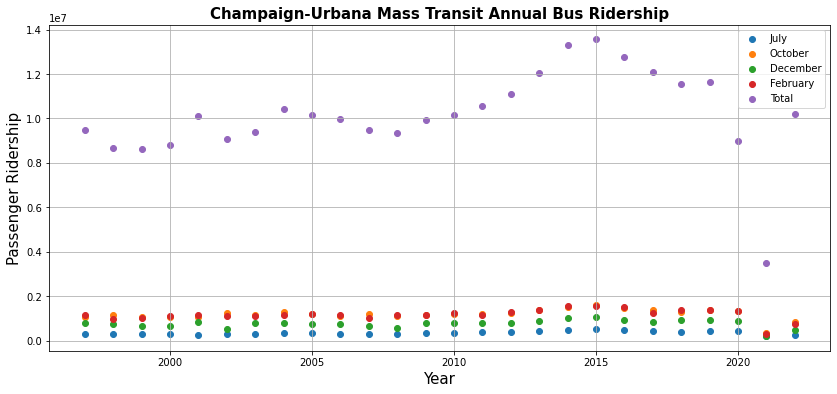

In [42]:
#### Now we are going to plot the graph using matplotlib to visualize our data input
x = df['Year'] #x-axis is going to be our year
figure = plt.figure(figsize=(14,6)) #adjust the figure size
plt.title('Champaign-Urbana Mass Transit Annual Bus Ridership',fontweight='bold',fontsize=15) #add the title
plt.grid() #add the grid
plt.xlabel('Year',fontsize=15) #add the x-axis label
plt.ylabel('Passenger Ridership',fontsize=15) #add the y-axis label
temp = df.drop('Year',axis=1) #Just drop the year column because we are not going to use that for our data analytics
for i in temp.columns: #Now for each column in our python dataframe column
    plt.scatter(x,temp[i]) #I want to keep plotting
    
plt.legend(temp) #Don't forget to add the legend

In [43]:
finalized = temp #we will be analyzing the basic statistics using this dataframe

#########Ridership Analysis in further detail
for i in finalized.columns:
    print('Maximum ridership for',i,'is',finalized[i].max())
    print('Minimum ridership for',i,'is',finalized[i].min())
    print('Mean ridership for',i,'is',int(finalized[i].mean()))
    print('Range for',i,'is',int(finalized[i].max() - finalized[i].min()))
    print()

Maximum ridership for July is 524178
Minimum ridership for July is 226004
Mean ridership for July is 353758
Range for July is 298174

Maximum ridership for October is 1606340
Minimum ridership for October is 343765
Mean ridership for October is 1200680
Range for October is 1262575

Maximum ridership for December is 1068610
Minimum ridership for December is 214183
Mean ridership for December is 766296
Range for December is 854427

Maximum ridership for February is 1582330
Minimum ridership for February is 318071
Mean ridership for February is 1181454
Range for February is 1264259

Maximum ridership for Total is 13551784.0
Minimum ridership for Total is 3480360.0
Mean ridership for Total is 10183726
Range for Total is 10071424



# 02. Monthly Ridership Trend Analysis

Text(0.5, 1.0, 'Passenger Ridership vs Months')

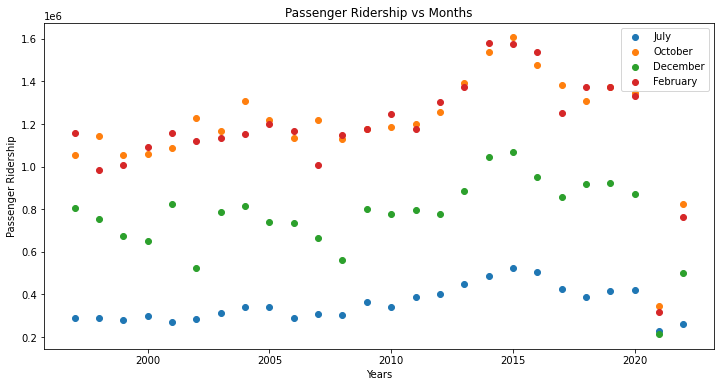

In [44]:
months1 = df.drop('Year',axis=1)
months = months1.drop('Total',axis=1)
plt.figure(figsize=(12,6))
for i in months.columns:
    plt.scatter(x,months[i])
plt.legend(months)
plt.xlabel('Years')
plt.ylabel('Passenger Ridership')
plt.title('Passenger Ridership vs Months')

In [45]:
#The function which uses the linear regression method to determine the line of best fit
def linear_regression(x,temp,month_name,degree,co): 
    linear_reg = np.polyfit(x,temp,deg = degree)
    linear_trend = np.polyval(linear_reg,x) #slope and y intercept
    plt.scatter(x,temp,label='plots',color='b')
    plt.plot(x,linear_trend,label='line of best fit',color=co)
    plt.xlabel('Years')
    plt.ylabel('Passenger Ridership')
    plt.title(month_name+' Ridership')
    plt.legend()
    plt.show()
    return figure

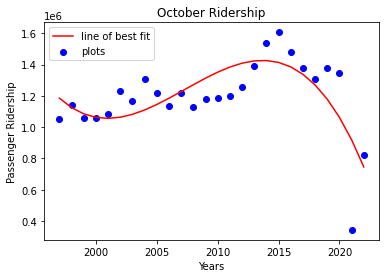

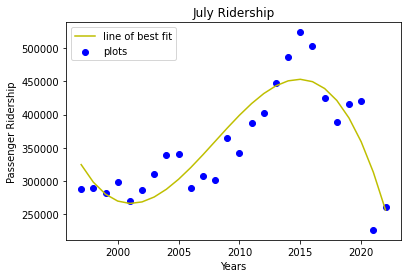

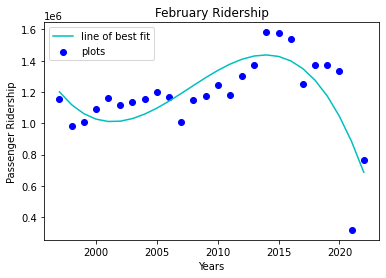

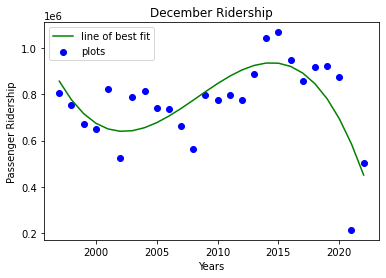

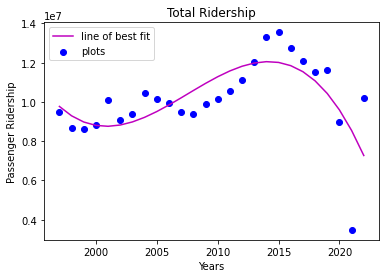

In [46]:
october = 'October'
linear_trend = linear_regression(x,months[october],october,3,'r')

july = 'July'
linear_trend = linear_regression(x,months[july],july,3,'y')

february = 'February'
linear_trend = linear_regression(x,months[february],february,3,'c')

december = 'December'
linear_trend = linear_regression(x,months[december],december,3,'g')

total = 'Total'
linear_trend = linear_regression(x,months1[total],total,3,'m')

# 3. Machine Learning and Dataset Training

In [107]:
import sklearn
from sklearn import svm, preprocessing
dfsvm = sklearn.utils.shuffle(df)

x = dfsvm.drop('Total',axis=1).values #should be a 2D matrix
x = preprocessing.scale(x) #we are going to scale the data
y = dfsvm['Total'].values #
print(y)

percent = 80
test_size = int((percent/100) * (x.shape[0]))
x_train, y_train = x[:-test_size],y[:-test_size]  #up to the last 200

x_test, y_test = x[-test_size:],y[-test_size:] #from the last 20
clf = svm.SVR(kernel='rbf')
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

[12028172. 11107631.  9365436.  9919993. 12770520.  8670906.  8967585.
  8628101.  3480360.  9501302. 13551784. 10102665. 12099043. 10435923.
 10136585. 10134192.  9958497. 11629163. 10549120. 10183726. 13309332.
  9369218.  9084277.  8800655. 11528385.  9464314.]


-0.05333901802386154

In [108]:
for x,y in zip(x_test,y_test):
    print(f' model: {clf.predict([x])[0]}, Actual: {y}')

 model: 10513813.215664687, Actual: 8967585.0
 model: 10513810.372913856, Actual: 8628101.0
 model: 10513811.86588389, Actual: 3480360.0
 model: 10513810.69526061, Actual: 9501302.0
 model: 10513812.937659513, Actual: 13551784.0
 model: 10513810.6047189, Actual: 10102665.0
 model: 10513813.26720635, Actual: 12099043.0
 model: 10513810.99949888, Actual: 10435923.0
 model: 10513810.762802357, Actual: 10136585.0
 model: 10513811.339433296, Actual: 10134192.0
 model: 10513810.37280234, Actual: 9958497.0
 model: 10513813.33896781, Actual: 11629163.0
 model: 10513811.881080454, Actual: 10549120.0
 model: 10513811.786429359, Actual: 10183726.0
 model: 10513813.26524213, Actual: 13309332.0
 model: 10513810.399813443, Actual: 9369218.0
 model: 10513810.601165492, Actual: 9084277.0
 model: 10513810.307953816, Actual: 8800655.0
 model: 10513813.063208219, Actual: 11528385.0
 model: 10513810.36458935, Actual: 9464314.0
